In [1]:
import pickle
with open("train_data.txt", "rb") as myFile:
    data = pickle.load(myFile)


In [2]:
header=data[0]
data=data[1:]


In [3]:
x_values=[w[0] for w in data[1:]]
y_values=[w[1] for w in data[1:]]
z_values=[w[2] for w in data[1:]]

In [4]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

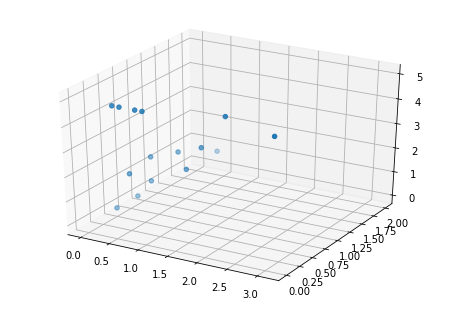

In [5]:
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x_values, y_values,z_values)

In [6]:
%matplotlib inline

data

[(1.62, 0.0, 5),
 (0.5, 0.25, 2.0),
 (0.62, 1.0, 2.0),
 (0.5, 0.0, 5),
 (1.12, 0.62, 2.0),
 (1.38, 0.62, 3.0),
 (0.38, 0.75, 1.0),
 (0.88, 0.0, 5),
 (0.0, 0.5, 0.0),
 (2.12, 0.25, 5),
 (1.0, 0.0, 5),
 (3.12, 0.0, 5),
 (0.38, 0.75, 2.0),
 (0.62, 0.0, 5),
 (0.0, 0.88, 0.0),
 (0.38, 2.0, 0.67)]

In [17]:
from kmeans import *
from random import randint
k=3
c=[]
c_new=[]
clusters=[]    
for i in range(k):
    c.append(None)
    c_new.append(None)
    c[i]=data[randint(0, len(data)-1)]
    clusters.append([])
print(c)
iteration=1
while(True):
    print("\n",iteration,":")
    for i in range(len(data)):
        pos=None
        min_dist=9999
        for j in range(k):
            dist=distance(3,c[j],data[i])
            if dist<min_dist:
                min_dist=dist
                pos=j
        clusters[pos].append(i+1)
    flag=0
    for i in range(k):
        c_new[i]=centroid(clusters[i],data)
        print(c_new[i],c[i])
        if( all(j == k for j, k in zip(c_new[i],c[i])))== False:
            flag=1
    print (clusters)
    if flag==0:
        break
    else:
        for i in range(k):
            clusters[i]=[]
            c[i]=c_new[i]

    iteration+=1
    if iteration==10:
        break



    

[(0.0, 0.88, 0.0), (1.12, 0.62, 2.0), (1.38, 0.62, 3.0)]

 1 :
(0.19, 1.0325, 0.4175) (0.0, 0.88, 0.0)
(0.655, 0.655, 2.0) (1.12, 0.62, 2.0)
(1.405, 0.10875, 4.75) (1.38, 0.62, 3.0)
[[7, 9, 15, 16], [2, 3, 5, 13], [1, 4, 6, 8, 10, 11, 12, 14]]

 2 :
(0.19, 1.0325, 0.4175) (0.19, 1.0325, 0.4175)
(0.8, 0.648, 2.2) (0.655, 0.655, 2.0)
(1.4085714285714286, 0.03571428571428571, 5.0) (1.405, 0.10875, 4.75)
[[7, 9, 15, 16], [2, 3, 5, 6, 13], [1, 4, 8, 10, 11, 12, 14]]

 3 :
(0.19, 1.0325, 0.4175) (0.19, 1.0325, 0.4175)
(0.8, 0.648, 2.2) (0.8, 0.648, 2.2)
(1.4085714285714286, 0.03571428571428571, 5.0) (1.4085714285714286, 0.03571428571428571, 5.0)
[[7, 9, 15, 16], [2, 3, 5, 6, 13], [1, 4, 8, 10, 11, 12, 14]]


 [(0.19, 1.0325, 0.4175), (0.8, 0.648, 2.2), (1.4085714285714286, 0.03571428571428571, 5.0)]


7 0.38 0.75 1.0 #0000FF
9 0.0 0.5 0.0 #0000FF
15 0.0 0.88 0.0 #0000FF
16 0.38 2.0 0.67 #0000FF
2 0.5 0.25 2.0 #00FF00
3 0.62 1.0 2.0 #00FF00
5 1.12 0.62 2.0 #00FF00
6 1.38 0.62 3.0 #00FF00
13 0.38 0.75 2.0 #00FF00
1 1.62 0.0 5 #FF0066
4 0.5 0.0 5 #FF0066
8 0.88 0.0 5 #FF0066
10 2.12 0.25 5 #FF0066
11 1.0 0.0 5 #FF0066
12 3.12 0.0 5 #FF0066
14 0.62 0.0 5 #FF0066


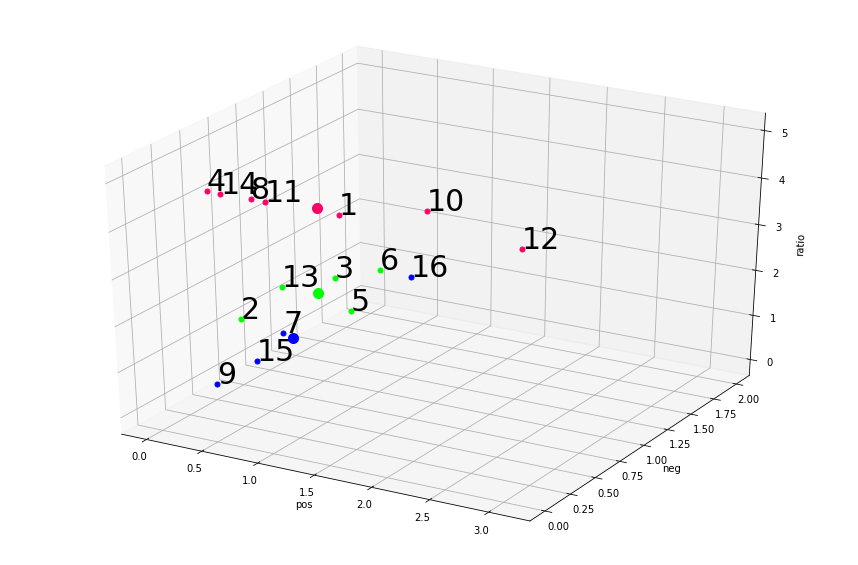

In [18]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
colors=["#0000FF", "#00FF00", "#FF0066"]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    #colors.append("%03x" % random.randint(0, 0xFFF))
    ax.scatter(c[i][0],c[i][1],c[i][2],color=colors[i],s=100)
    for j in clusters[i]:
        print(j,data[j-1][0],data[j-1][1],data[j-1][2],colors[i])
        
        ax.scatter(data[j-1][0],data[j-1][1],data[j-1][2],color=colors[i],s=25)
        ax.text(data[j-1][0],data[j-1][1],data[j-1][2],  '%s' % (str(j)), size=30, zorder=1)
ax.set_xlabel('pos')
ax.set_ylabel('neg')
ax.set_zlabel('ratio')
plt.show()


In [19]:
test_set={}
train_set={}

import csv
def reassign(i,cluster_class):
    for j in clusters[i]:
        train_set[j]=cluster_class
def label_clusters():
    accuracy=0
    
    
    with open("kmeans_test.csv") as csv_file:
        reader=csv.reader(csv_file)
        next(reader)
        for row in reader:
            test_set[int(row[0])]=row[2]
   
    g_count=b_count=n_count=0
    
    for i in range(k):
        for j in clusters[i]:
            print(j)
            if j in test_set:
                if test_set[j]=='g':
                    g_count+=1
                elif test_set[j]=='b':
                    b_count+=1
                elif test_set[j]=='n':
                    n_count+=1
        if(g_count== max(g_count,b_count,n_count)):
            reassign(i,'g')
        if(b_count== max(g_count,b_count,n_count)):
            reassign(i,'b')
       
        if(n_count== max(g_count,b_count,n_count)):
            reassign(i,'n')
                    
            
    
    print(test_set)    
    print(train_set)

label_clusters()

7
9
15
16
2
3
5
6
13
1
4
8
10
11
12
14
{1: 'g', 2: 'g', 3: 'b', 4: 'n', 5: 'g', 6: 'b', 7: 'b', 8: 'g', 9: 'b', 10: 'n'}
{7: 'b', 9: 'b', 15: 'b', 16: 'b', 2: 'b', 3: 'b', 5: 'b', 6: 'b', 13: 'b', 1: 'b', 4: 'b', 8: 'b', 10: 'b', 11: 'b', 12: 'b', 14: 'b'}


In [20]:
def accuracy():
    total=len(test_set)
    correct=0
    for i in train_set:
        if i in test_set and train_set[i]==test_set[i]:
            correct+=1
    print(float(correct/total)*100,'%')
accuracy()

40.0 %


In [ ]:

headers=[header for header in header]
headers.append('class')
print(headers)
with open ("rulebase.csv","w") as csv_file:
    writer=csv.writer(csv_file)
    writer.writerow(headers)
    for i in train_set:
        row=[]
     
        for value in data[i-1]:
            row.append(value)
        row.append(train_set[i])
        writer.writerow(row)